#### 1. Load the dataset into python environment

In [1]:
import pandas as pd
df=pd.read_csv('titanic_dataset.csv') # reading the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Make ‘PassengerId’ as the index column

In [2]:
df.set_index('PassengerId',inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. Check the basic details of the dataset

In [3]:
df.info() #gives a concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The dataset consists of 11 columns and 891 rows with 3 columns(Age, Cabin, Embarked) having missing values

In [4]:
df.describe() #gives the basic statistical details of the numerical columns

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 4. Fill in all the missing values present in all the columns in the dataset

In [5]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

From the above output we can see that there are 177 values missing from Age column, 2 values missing from Embarked column and 687 values missing from Cabin column. Since 687 missing values amounts to nearly 80% of total Cabin data it is better to drop Cabin column rather than filling it.

In [6]:
#dropping Cabin column
df.drop(columns=['Cabin'],inplace=True)

Text(0.5, 1.0, 'Age distribution-plot')

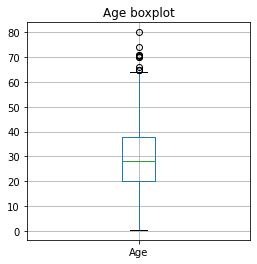

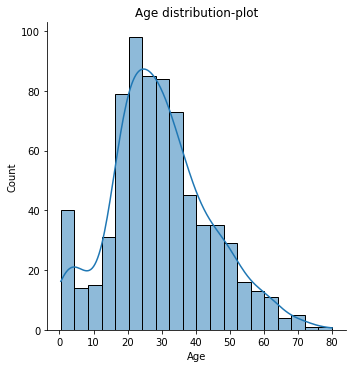

In [9]:
# to determine how missing data in Age column needs to be filled we need to check how the available data points are distributed
import matplotlib.pyplot as plt
import seaborn as sns
#checking using boxplot
plt.figure(figsize=(4,4))
df.boxplot(column='Age')
plt.title('Age boxplot',fontsize=12)
#checking using distribution plot
sns.displot(data=df, x="Age", kde=True)
plt.title('Age distribution-plot',fontsize=12)

As the Age data is slightly skewed to the right we will go for filling missing data using Median of Age column

Since Embarked is a categorical column, the missing values can be filled in using Mode

In [10]:
#filling the missing values in Age and Embarked columns
df.fillna({'Age':df['Age'].median(),'Embarked':df['Embarked'].mode()[0]},inplace=True)
df.isna().sum() # confirming if all null values are filled

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### 5. Check and handle outliers in at least 3 columns in the dataset

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As per the above output the 3 columns for which range is high is Fare, Age and SibSp. 

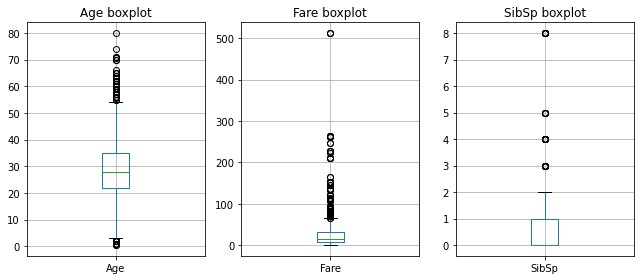

In [13]:
#checking for outliers in columns Age, Fare, SibSp
plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
df.boxplot(column='Age')
plt.title('Age boxplot',fontsize=12)
plt.subplot(1,3,2)
df.boxplot(column='Fare')
plt.title('Fare boxplot',fontsize=12)
plt.subplot(1,3,3)
df.boxplot(column='SibSp')
plt.title('SibSp boxplot',fontsize=12)
plt.tight_layout()

From the above boxplots we can see the presence of outliers which much higher in case of age and fare.

Based on interquartile rule outliers are those data points lying below Q1 or above Q3 by 1.5 times interquartile range. We can manipulate the outliers with the upper and lower limits by capping it. 

In [14]:
df[['Age','Fare','SibSp']].describe() #before manipulating outliers

,Age,Fare,SibSp
count,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.523008
std,13.019697,49.693429,1.102743
min,0.420000,0.000000,0.000000
25%,22.000000,7.910400,0.000000
50%,28.000000,14.454200,0.000000
75%,35.000000,31.000000,1.000000
max,80.000000,512.329200,8.000000


In [15]:
outliers_list=['Age','Fare','SibSp']
for i in outliers_list:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    print(i)
    print("Q1= ",Q1)
    print("Q3= ",Q3)
    print("IQR= ",IQR)
    print("Upper limit= ",u_lim)
    print("Lower limit= ",l_lim,"\n")
    df[i].where(df[i] >=l_lim,l_lim, inplace=True)  #replacing all lower outliers with lower limit
    df[i].where(df[i] <=u_lim,u_lim, inplace=True)  #replacing all upper outliers with upper-limit
df[['Age','Fare','SibSp']].describe() #after manipulating outliers

Age
Q1=  22.0
Q3=  35.0
IQR=  13.0
Upper limit=  54.5
Lower limit=  2.5 

Fare
Q1=  7.9104
Q3=  31.0
IQR=  23.0896
Upper limit=  65.6344
Lower limit=  -26.724 

SibSp
Q1=  0.0
Q3=  1.0
IQR=  1.0
Upper limit=  2.5
Lower limit=  -1.5 



,Age,Fare,SibSp
count,891.000000,891.000000,891.000000
mean,29.039282,24.046813,0.426487
std,12.072074,20.481625,0.708246
min,2.500000,0.000000,0.000000
25%,22.000000,7.910400,0.000000
50%,28.000000,14.454200,0.000000
75%,35.000000,31.000000,1.000000
max,54.500000,65.634400,2.500000


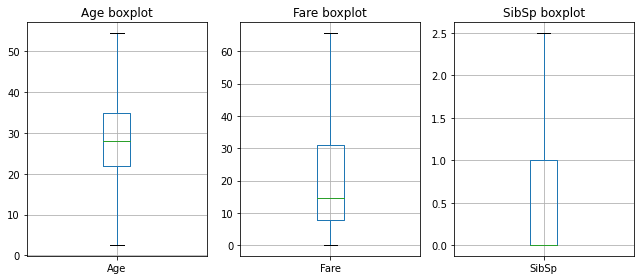

In [16]:
#checking for outliers via boxplot
plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
df.boxplot(column='Age')
plt.title('Age boxplot',fontsize=12)
plt.subplot(1,3,2)
df.boxplot(column='Fare')
plt.title('Fare boxplot',fontsize=12)
plt.subplot(1,3,3)
df.boxplot(column='SibSp')
plt.title('SibSp boxplot',fontsize=12)
plt.tight_layout()

As per the above boxplots we can see that there are no outliers now 

In [17]:
#since SibSp consists of integer numbers only we can round off the decimal values to next highest integer
import numpy as np
df['SibSp']=df['SibSp'].apply(np.ceil)

In [18]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.039282,0.452301,0.381594,24.046813
std,0.486592,0.836071,12.072074,0.788059,0.806057,20.481625
min,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,54.500000,3.000000,6.000000,65.634400


#### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S


From the above dataset we can remove the columns which are not integral in predicting target 'Survived'. This includes PassengerId, Name, Ticket

In [21]:
df1=df.copy()

In [28]:
df.drop(columns=['Name','Ticket'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1.0,0,7.2500,S
2,1,1,female,38.0,1.0,0,65.6344,C
3,1,3,female,26.0,0.0,0,7.9250,S
4,1,1,female,35.0,1.0,0,53.1000,S
5,0,3,male,35.0,0.0,0,8.0500,S


In [29]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import preprocessing
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True) #dummy-coding categorical columns
y=df['Survived'] #setting target 
X=df.drop(columns=['Survived']) #setting the features
print("Before MinMax scaling")
print(X.describe())
print("\n")
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X) # applying minmax scaling
X=pd.DataFrame(X)
print("After MinMax scaling")
print(X.describe())
print("\n\n")
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2) #splitting the data into train(80%) and test set(20%)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train) #creating linear regression model based on train data
predictions=model.predict(X_test) #predicted target based on test data

#finding the MSE and R^2 values based on prediction and target test data
print("MSE: ",mean_squared_error(y_test,predictions))
print("R-squared value: ",r2_score(y_test,predictions))

Before MinMax scaling
           Pclass         Age       SibSp       Parch        Fare    Sex_male  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     2.308642   29.039282    0.452301    0.381594   24.046813    0.647587   
std      0.836071   12.072074    0.788059    0.806057   20.481625    0.477990   
min      1.000000    2.500000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   22.000000    0.000000    0.000000    7.910400    0.000000   
50%      3.000000   28.000000    0.000000    0.000000   14.454200    1.000000   
75%      3.000000   35.000000    1.000000    0.000000   31.000000    1.000000   
max      3.000000   54.500000    3.000000    6.000000   65.634400    1.000000   

       Embarked_Q  Embarked_S  
count  891.000000  891.000000  
mean     0.086420    0.725028  
std      0.281141    0.446751  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      0.000000    1.0

As per the above results the mean squared value is small i.e. 0.135, the R-squared value of 0.44 is not good enough for the regression analysis as it denotes the regression line is not good fit